Ссылка на датасе: https://www.kaggle.com/kashnitsky/mlcourse?select=video_games_sales.csv

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(16719, 16)

In [ ]:
df.size

267504

In [ ]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [ ]:
cols = list(df.columns)
cols

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [ ]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'Critic_Count': 8582,
 'Critic_Score': 8582,
 'Developer': 6623,
 'EU_Sales': 0,
 'Genre': 2,
 'Global_Sales': 0,
 'JP_Sales': 0,
 'NA_Sales': 0,
 'Name': 2,
 'Other_Sales': 0,
 'Platform': 0,
 'Publisher': 54,
 'Rating': 6769,
 'User_Count': 9129,
 'User_Score': 6705,
 'Year_of_Release': 269}

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'Critic_Count': 0,
 'Critic_Score': 0,
 'Developer': 0,
 'EU_Sales': 0,
 'Genre': 0,
 'Global_Sales': 0,
 'JP_Sales': 0,
 'NA_Sales': 0,
 'Name': 0,
 'Other_Sales': 0,
 'Platform': 0,
 'Publisher': 0,
 'Rating': 0,
 'User_Count': 0,
 'User_Score': 0,
 'Year_of_Release': 0}

In [ ]:
df.shape

(6825, 16)

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


**2. Продажа видеоигр по регионе**

In [ ]:
NA = df["NA_Sales"].sum()
EU = df["EU_Sales"].sum()
JP = df["JP_Sales"].sum()
Other = df["Other_Sales"].sum()
Global = df["Global_Sales"].sum()

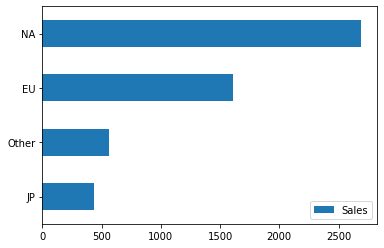

In [ ]:
Region_Sales = pd.DataFrame(
    {"Sales": [Other, JP, EU, NA]}, 
    index=["Other", "JP", "EU", "NA"])
Region_Sales.sort_values(by='Sales', ascending=True).plot(kind="barh")

**3. Продажа игр по жанру**

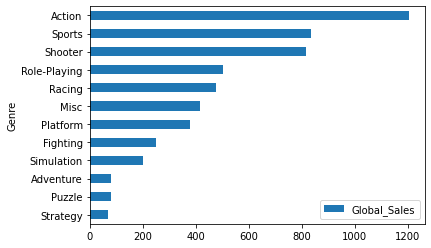

In [ ]:
df.groupby(['Genre']).sum().sort_values(by='Global_Sales', ascending=True).plot(kind='barh', y = 'Global_Sales')

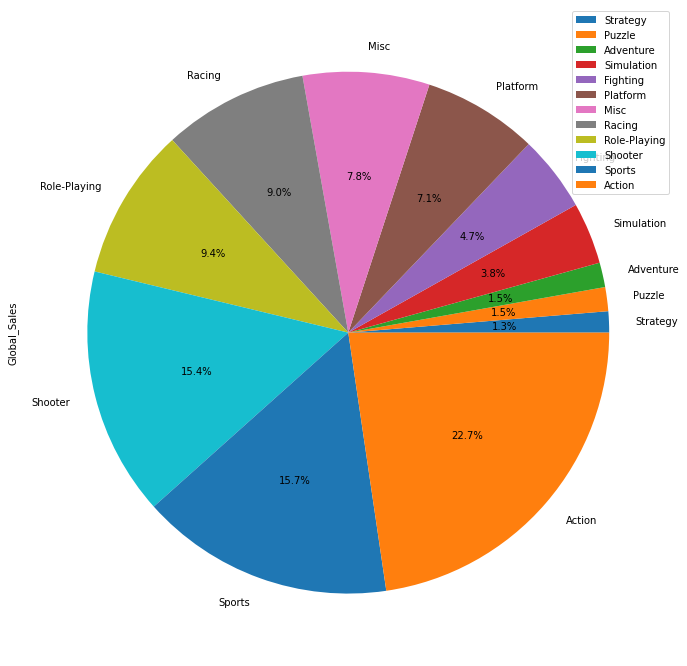

In [ ]:
df.groupby(['Genre']).sum().sort_values(by='Global_Sales', ascending=True).plot(kind='pie', y='Global_Sales', figsize=(15,12), autopct='%1.1f%%')


**4. Продажа игр по году выпуска**

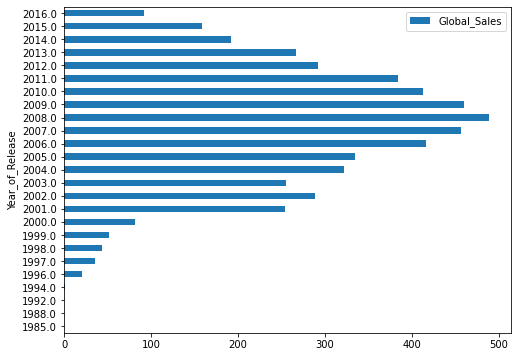

In [ ]:
df.groupby(['Year_of_Release']).sum().plot(kind='barh', y='Global_Sales',figsize=(8,6))

**5. Выпуск игр по году.**

In [ ]:
year_data = {year: df["Year_of_Release"].to_list().count(year) for year in set(df["Year_of_Release"])}

In [ ]:
year_df = pd.DataFrame.from_dict(data=year_data, orient="index", columns=["Number of Games"])

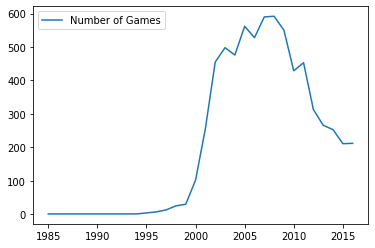

In [ ]:
year_df.plot()

**6. Выпуск игр по жанру**

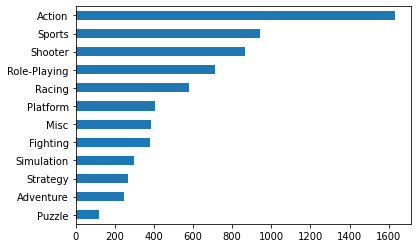

In [ ]:
df["Genre"].value_counts().sort_values().plot(kind='barh')

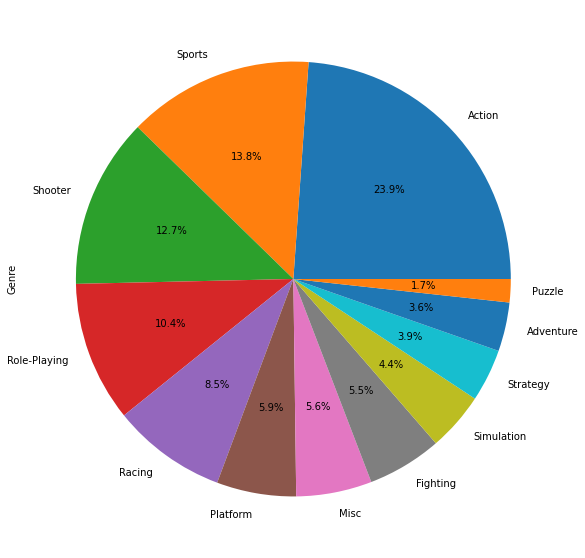

In [ ]:
df["Genre"].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(15,10))

**7. Выпуск популярных жанров по году**

In [ ]:
action_df = df.loc[df["Genre"] == "Action"]

In [ ]:
shooter_df = df.loc[df["Genre"]=="Shooter"]

In [ ]:
sports_df = df.loc[df["Genre"]=="Sports"]

In [ ]:
action_data = {year: action_df["Year_of_Release"].to_list().count(year) for year in set(action_df["Year_of_Release"])}
to_add_action_data = {year: 0 for year in set(df["Year_of_Release"]) if year not in set(action_df["Year_of_Release"])}
action_data.update(to_add_action_data)
year_action_df = pd.DataFrame.from_dict(data=action_data,
                                        orient="index", 
                                  columns=["Action games"])
year_action_df = year_action_df.sort_index(axis=0)

In [ ]:
shooter_data = {year: shooter_df["Year_of_Release"].to_list().count(year) for year in set(shooter_df["Year_of_Release"])}
to_add_shooter_data = {year: 0 for year in set(df["Year_of_Release"]) if year not in set(shooter_df["Year_of_Release"])}
shooter_data.update(to_add_shooter_data)
year_shooter_df = pd.DataFrame.from_dict(data=shooter_data, 
                                  orient="index", 
                                  columns=["Shooter games"])
year_shooter_df = year_shooter_df.sort_index(axis=0)

In [ ]:
sports_data = {year: sports_df["Year_of_Release"].to_list().count(year) for year in set(sports_df["Year_of_Release"])}
to_add_sports_data = {year: 0 for year in set(df["Year_of_Release"]) if year not in set(sports_df["Year_of_Release"])}
sports_data.update(to_add_sports_data)
year_sports_df = pd.DataFrame.from_dict(data=sports_data, 
                                  orient="index", 
                                  columns=["Sports games"])
year_sports_df = year_sports_df.sort_index(axis=0)

In [ ]:
year_all = year_action_df.merge(year_shooter_df, left_index=True, right_index=True)
year_all = year_all.merge(year_sports_df, left_index=True, right_index=True)
year_all

,Action games,Shooter games,Sports games
1985.0,0,0,0
1988.0,0,0,0
1992.0,0,1,0
1994.0,0,0,0
1996.0,3,0,0
1997.0,1,2,0
1998.0,3,2,1
1999.0,4,0,1
2000.0,15,10,13
2001.0,33,28,48


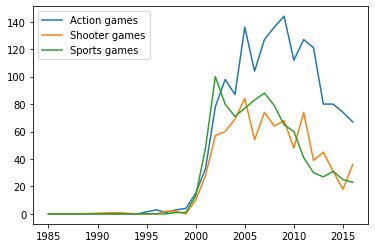

In [ ]:
year_all.plot()

**8. Количество игр по рейтингу**

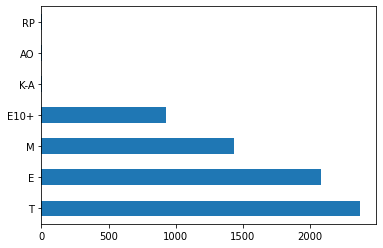

In [ ]:
df["Rating"].value_counts().plot(kind='barh')

In [ ]:
sub_df = df.loc[(df["Rating"] == "E10+") | (df["Rating"] == "M") | (df["Rating"] == "E") | (df["Rating"] == "T")]

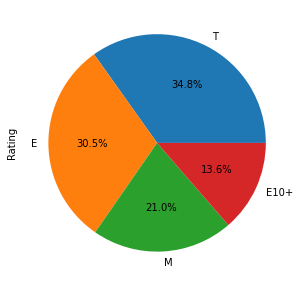

In [ ]:
sub_df["Rating"].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(5,5))

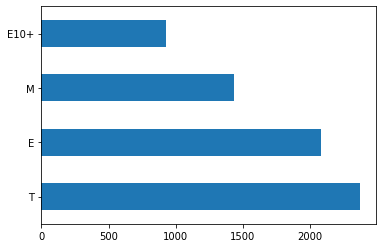

In [ ]:
sub_df["Rating"].value_counts().plot(kind='barh')

**9. Соответственность оценки критиков и оценки пользователей по жанру**

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
df['User_Score'] = df['User_Score'].astype(float)

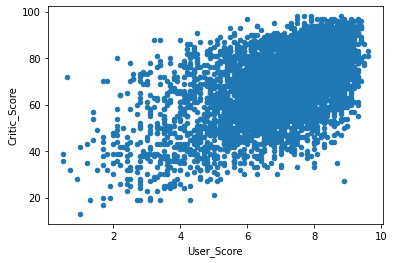

In [ ]:
df.plot.scatter(x='User_Score', y='Critic_Score')

**10. Продажа игр по регионе и по платформе**

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_grouped = df.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_grouped.sort_values(by='Other_Sales', ascending=True, inplace=True)
df_grouped

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
DC,1.54,0.29,2.66,0.06
GBA,79.39,32.60,16.13,3.58
GC,107.93,30.93,16.12,4.27
PSV,9.93,8.77,7.62,4.51
WiiU,30.69,20.42,10.17,4.80
XB,153.23,50.24,1.20,7.26
3DS,48.67,33.33,33.57,7.65
PS,91.76,64.58,38.85,11.46
XOne,75.58,42.02,0.29,11.59


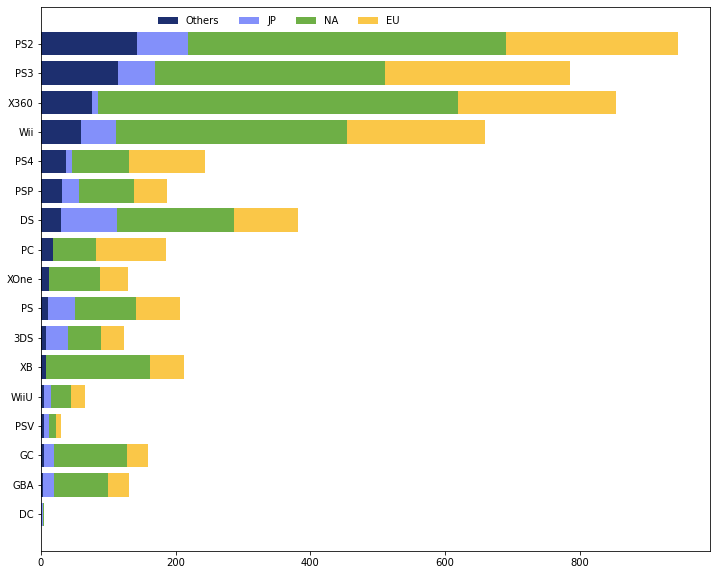

In [ ]:
fields = ['Other_Sales','JP_Sales','NA_Sales','EU_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Others','JP','NA', 'EU']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)